Image Classification

In [32]:
import tensorflow as tf

In [33]:
print(tf.__version__)

2.12.0


In [34]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


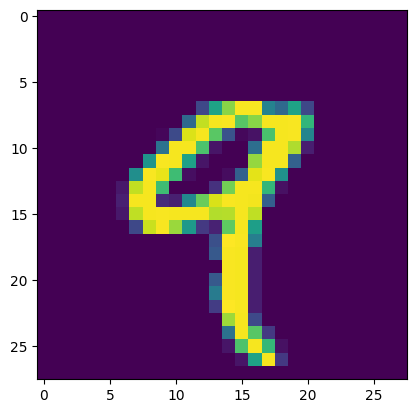

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[4], cmap="binary")
plt.show()

# Encoding Labels

In [37]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Shape changed to 10 dim vector
# Shape Validation
print(y_test.shape, y_test_encoded.shape)
print(y_test[1],"===>",y_test_encoded[1])


(10000,) (10000, 10)
2 ===> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Constructing Neural Networks

In [38]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test,(10000, 784))

print('x_train_reshaped', x_train_reshaped.shape)


x_train_reshaped (60000, 784)


# Normalization of input Training data

In [39]:
x_mean= np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 2.71828

x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

print(x_train_norm)

[[-0.40989243 -0.40989243 -0.40989243 ... -0.40989243 -0.40989243
  -0.40989243]
 [-0.40989243 -0.40989243 -0.40989243 ... -0.40989243 -0.40989243
  -0.40989243]
 [-0.40989243 -0.40989243 -0.40989243 ... -0.40989243 -0.40989243
  -0.40989243]
 ...
 [-0.40989243 -0.40989243 -0.40989243 ... -0.40989243 -0.40989243
  -0.40989243]
 [-0.40989243 -0.40989243 -0.40989243 ... -0.40989243 -0.40989243
  -0.40989243]
 [-0.40989243 -0.40989243 -0.40989243 ... -0.40989243 -0.40989243
  -0.40989243]]


# Creating a Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([Dense(128, activation='relu', input_shape=(784,)),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')])

In [41]:
model.compile(optimizer = 'sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x_train_norm, y_train_encoded, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3872 - accuracy: 0.8875
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1921 - accuracy: 0.9450
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1452 - accuracy: 0.9577


In [43]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print("accuracy", accuracy*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.1330 - accuracy: 0.9597
accuracy 95.96999883651733


In [45]:
preds = model.predict(x_test_norm)
print("shape of pred:", preds.shape)

313/313 [==============================] - 1s 2ms/step
shape of pred: (10000, 10)


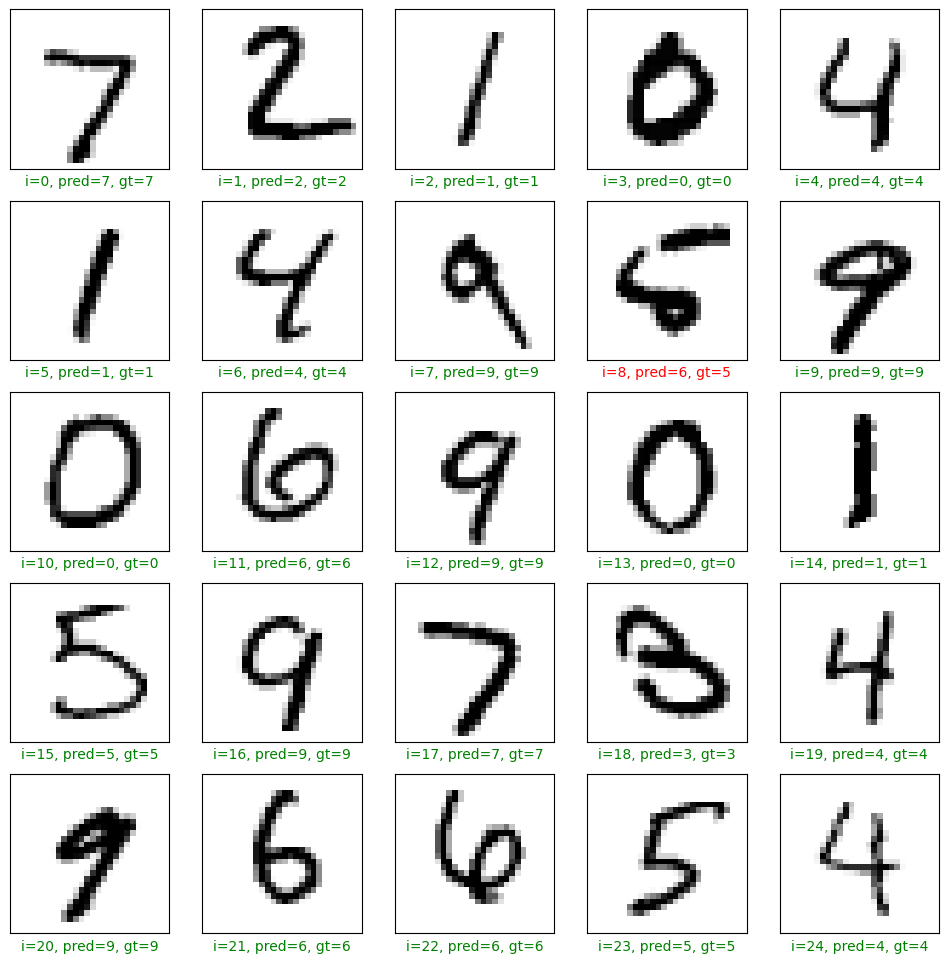

In [49]:
plt.figure(figsize=(12,12))
start_index = 0

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[start_index+i])
  gt = y_test[start_index+i]
  col = 'g'
  if pred !=gt:
    col = 'r'
  plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
  plt.imshow(x_test[start_index+i], cmap='binary')
plt.show()

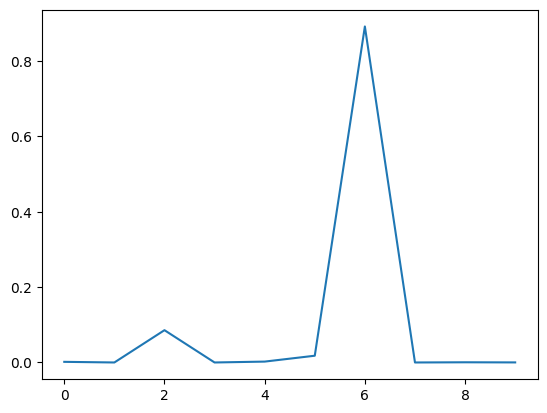

In [51]:
plt.plot(preds[8])
plt.show()